In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

1) Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241. 

In [3]:
data = pd.read_csv(r'/Users/u17491440/PycharmProjects/enterInML/data/week_5/gbm-data.csv')
print(data.head())
print(data.size)

   Activity        D1        D2    D3   D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   

         D8        D9  ...    D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.585445  0.743663  ...        0      0      0      0      0      0      0   
1  0.411754  0.836582  ...        1      1      1      1      0      1      0   
2  0.517720  0.679051  ...        0      0      0      0      0      0      0   
3  0.288764  0.805110  ...        0      0      0      0      0      0      0   
4  0.303809  0.812646  ...        0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      0      0  
1     

2) Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
- Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
- Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
- Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

0.5978432299003044
      Iter       Train Loss   Remaining Time 
         1           1.0190           10.14s
         2           0.9246            9.40s
         3           0.8491            8.44s
         4           0.7722            7.49s
         5           0.7069            6.90s
         6           0.6672            6.36s
         7           0.6394            5.92s
         8           0.5763            6.12s
         9           0.5599            5.82s
        10           0.5445            5.60s
        20           0.2747            5.15s
        30           0.1705            4.59s
        40           0.1039            4.37s
        50           0.0682            4.02s
        60           0.0464            3.90s
        70           0.0300            3.61s
        80           0.0198            3.44s
        90           0.0136            3.17s
       100           0.0099            2.98s
       200           0.0004            0.89s
0.00021384367344295133 187
0.579432

<Figure size 1440x1440 with 0 Axes>

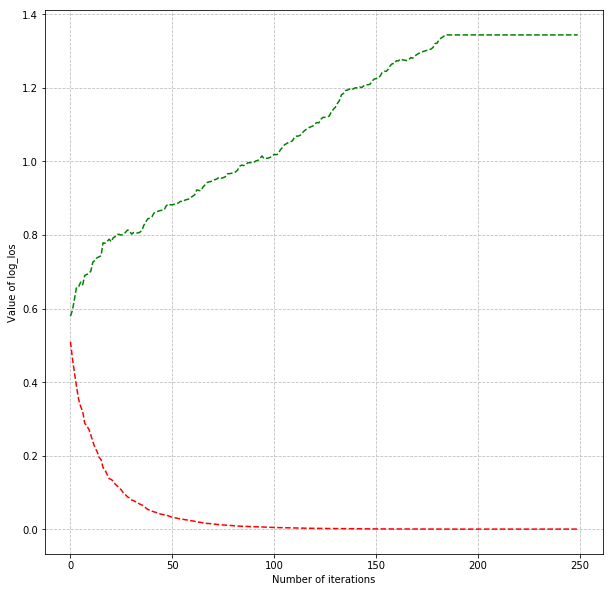

<Figure size 1440x1440 with 0 Axes>

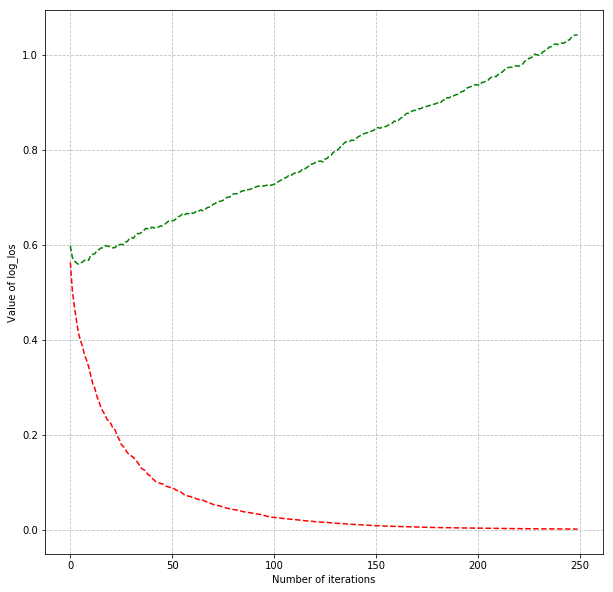

<Figure size 1440x1440 with 0 Axes>

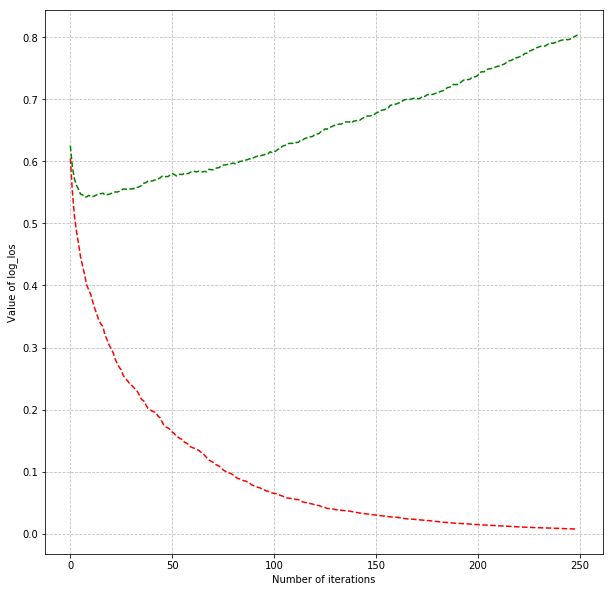

<Figure size 1440x1440 with 0 Axes>

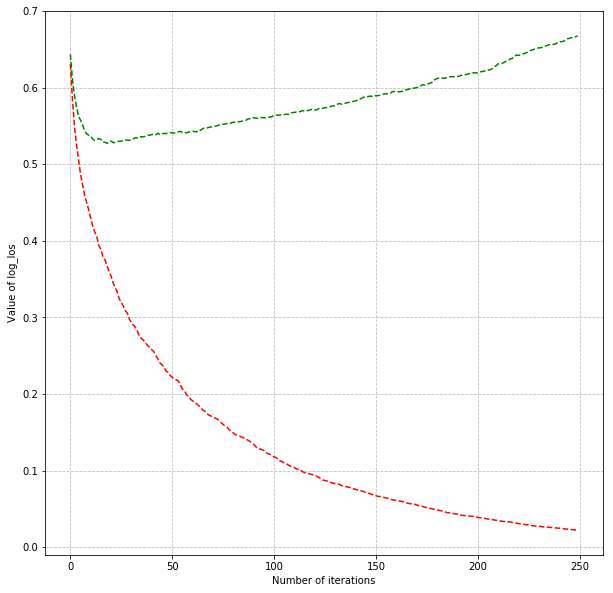

<Figure size 1440x1440 with 0 Axes>

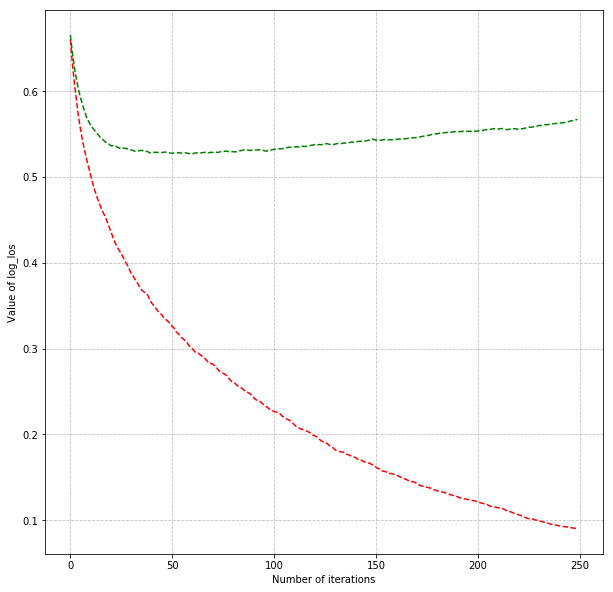

In [40]:
X = data[data.columns.values.tolist()[1:data.shape[1]-1]]
y = data['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)
mass = [1, 0.5, 0.3, 0.2, 0.1]

RFC = RandomForestClassifier(n_estimators=18, random_state=241)
RFC.fit(X_train, y_train)
q = RFC.predict_proba(X_test)
print(log_loss(y_test, q))

for i in range(0,5,1): 
    plt.figure(figsize=(20,20))
    GBC = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate = mass[i])
    GBC.fit(X_train, y_train)
    q = pd.DataFrame()
    z = pd.DataFrame()
  
    for i in  enumerate(GBC.staged_predict_proba(X_train)):
        q.loc[i[0],0] = log_loss(y_train, i[1][:,1])
        q.loc[i[0],1] = i[0]
    
    for i in  enumerate(GBC.staged_predict_proba(X_test)):
        z.loc[i[0],0] = log_loss(y_test, i[1][:,1])
        z.loc[i[0],1] = i[0]
        
    plt.figure(figsize=(10,10))
    plt.xlabel("Number of iterations")
    plt.ylabel("Value of log_los")
    plt.plot(q.loc[:,1],q.loc[:,0], 'r--')
    plt.plot(z.iloc[:,1],z.iloc[:,0], 'g--')
    plt.grid(True, linestyle='--', color='0.75')
    print(q.loc[:,0].min(), q.loc[:,0].idxmin())
    print(z.loc[:,0].min(), z.loc[:,0].idxmin())

3) Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

overfitting

4) Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

0.53 18

5) На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [59]:
X = data[data.columns.values.tolist()[1:data.shape[1]-1]]
y = data['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

RFC = RandomForestClassifier(n_estimators=50, random_state=241)
RFC.fit(X_train, y_train)
# predict_proba дает вероятности для полученных значений
# predict сами значения
q = RFC.predict_proba(X_test)
log_loss(y_test, q[:,1])

0.5316995100725718

1) Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: overfitting или underfitting? Введите одно слово.
overfitting

2) Приведите минимальное значение log-loss и номер итерации, на котором оно достигается, при learning_rate = 0.2 (числа необходимо вводить через пробел)
0.53 18

3) Какое качество на тесте получается у случайного леса из пятого пункта?
0.53 